In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("kc_house_data.csv", usecols=["price", "sqft_living", "yr_built"])

In [0]:
df["age of house"] = 2015 - df["yr_built"]
df.head()

,price,sqft_living,yr_built,age of house
0,221900.0,1180,1955,60
1,538000.0,2570,1951,64
2,180000.0,770,1933,82
3,604000.0,1960,1965,50
4,510000.0,1680,1987,28


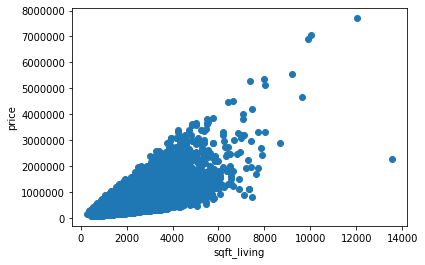

In [0]:
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.scatter(x=df["sqft_living"], y=df["price"])

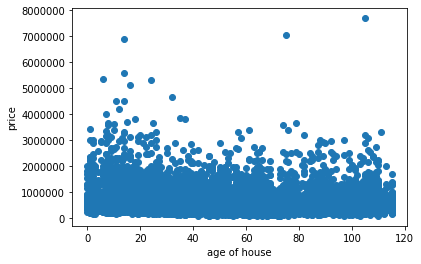

In [0]:
plt.xlabel("age of house")
plt.ylabel("price")
plt.scatter(x=df["age of house"], y=df["price"])

In [0]:
X = df.loc[:, ["sqft_living", "age of house"]]
y = df.loc[:, "price"]

In [0]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()
linear_model.fit(X, y)

print("""
intercept: %.2f
sqft_living:    %.2f
age of house:    %.2f
""" % (tuple([linear_model.intercept_]) + tuple(linear_model.coef_)))


intercept: -196929.07
sqft_living:    304.57
age of house:    2353.73



## Bootstrapping the Observations

In [0]:
def simple_resample(n): 
    return(np.random.randint(low = 0, high = n, size = n))

def bootstrap(boot_pop, statistic, resample = simple_resample, replicates = 10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

In [0]:
def sqft_coeff(data_array):
    X = data_array[:, 1:]
    y = data_array[:, 0]
    
    linear_model = lm.LinearRegression()
    model = linear_model.fit(X, y)
    theta_sqft = model.coef_[1]

    return theta_sqft

data_array = df.loc[:,  ["price", "age of house", "sqft_living"]].values

theta_hat_sampling = bootstrap(data_array, sqft_coeff)

## Constructing a Confidence Interval

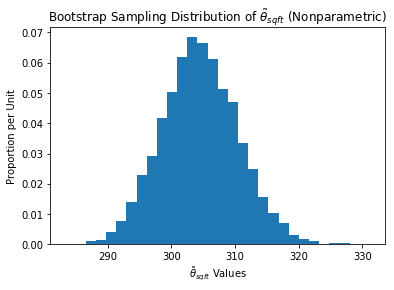

In [0]:
plt.hist(theta_hat_sampling, bins = 30, density = True)
plt.xlabel("$\\tilde{\\theta}_{sqft}$ Values")
plt.ylabel("Proportion per Unit")
plt.title("Bootstrap Sampling Distribution of $\\tilde{\\theta}_{sqft}$ (Nonparametric)");
plt.show()

In [0]:
np.percentile(theta_hat_sampling, 2.5), np.percentile(theta_hat_sampling, 97.5)

(293.0643343501463, 316.5597894314288)